In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
test  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

In [4]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [6]:
y=train['SalePrice']
train.drop(['SalePrice'],axis=1,inplace=True)

In [7]:
train.shape

(1460, 79)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


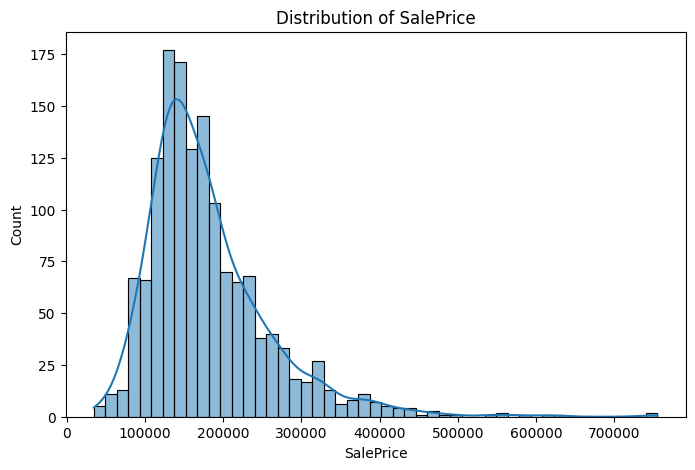

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-read clean version
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Now works fine
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


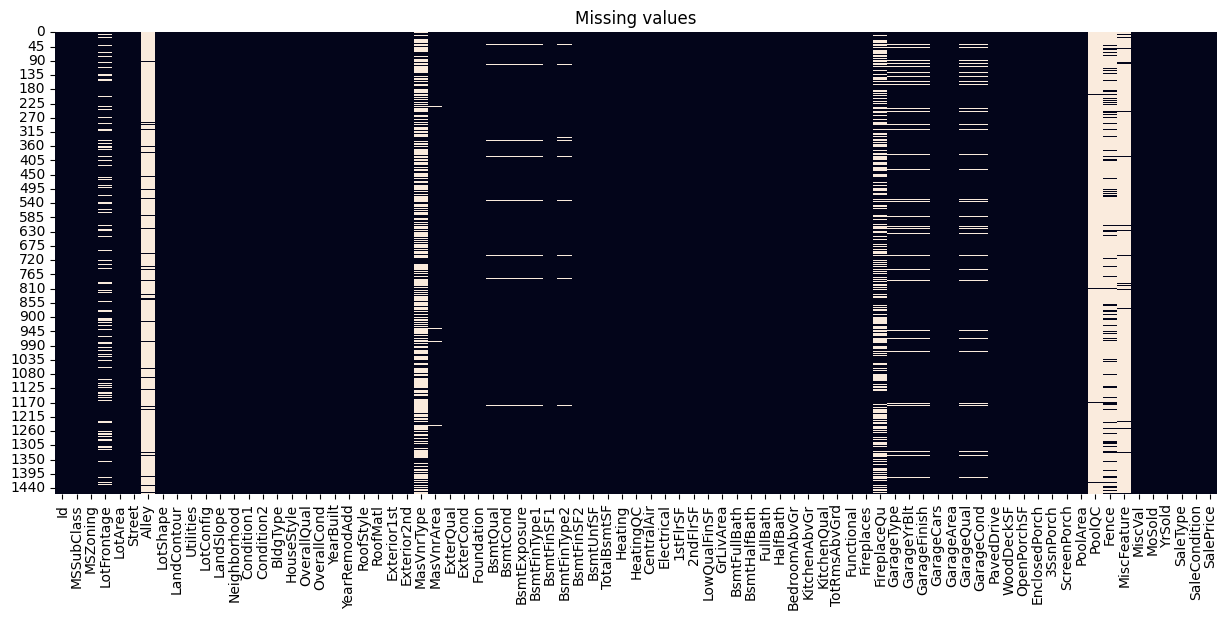

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(train.isnull(),cbar=False)
plt.title("Missing values")
plt.show()


In [10]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
num_cols=train.select_dtypes(include=['int64','float64']).columns.tolist()

In [13]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
cat_cols=train.select_dtypes(include=['object']).columns.tolist()


In [15]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
none_cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
             'GarageType','GarageFinish','GarageQual','GarageCond',
             'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in none_cols:
    train[col]=train[col].fillna('None')
    

In [17]:
zero_cols=['GarageYrBlt','GarageArea','GarageCars',
             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for col in zero_cols:
    train[col]=train[col].fillna(0)
    

In [18]:
zero_cols

['GarageYrBlt',
 'GarageArea',
 'GarageCars',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [19]:
train.isnull().sum().sum()

1140

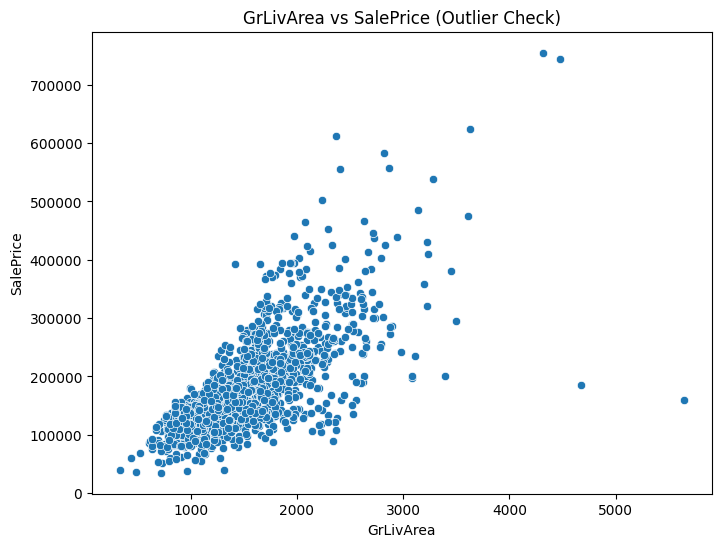

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)
plt.title('GrLivArea vs SalePrice (Outlier Check)')
plt.show()

In [21]:
outliers=train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,None,None,0,1,2008,New,Partial,160000


In [22]:
train=train.drop(outliers.index)

In [23]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [24]:
corr=train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr.head(15)

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
YearRemodAdd    0.507717
MasVnrArea      0.482719
Fireplaces      0.469862
BsmtFinSF1      0.409384
LotFrontage     0.370584
Name: SalePrice, dtype: float64

In [25]:
train.isnull().sum().sum()



1140

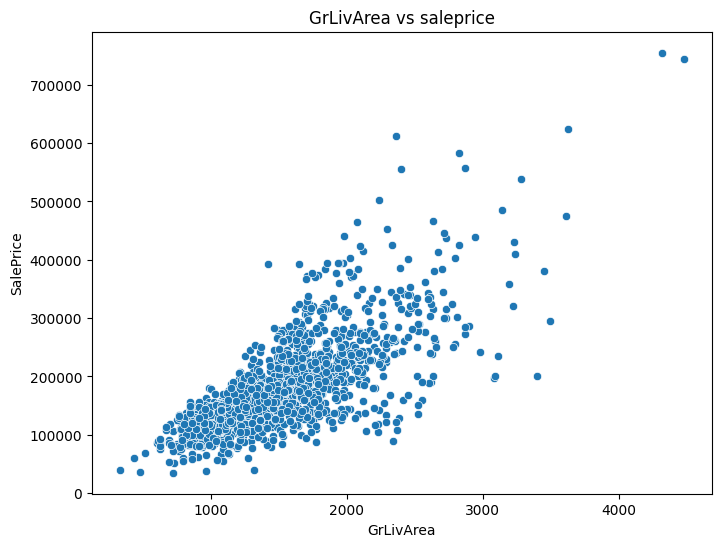

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)
plt.title('GrLivArea vs saleprice')
plt.show()

In [27]:
outliers=train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [28]:
train=train.drop(outliers.index)


In [29]:
corr=train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
GarageYrBlt      0.261435
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePr

In [30]:
corr.head()

SalePrice      1.000000
OverallQual    0.795774
GrLivArea      0.734968
TotalBsmtSF    0.651153
GarageCars     0.641047
Name: SalePrice, dtype: float64

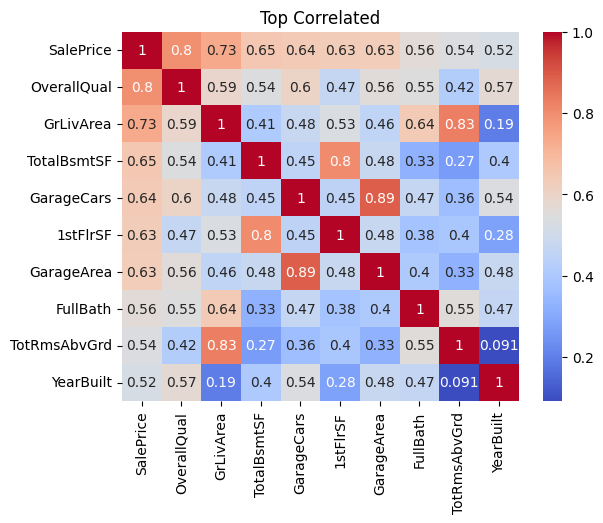

In [31]:
top_corr=corr.head(10).index
sns.heatmap(train[top_corr].corr(),annot=True,cmap='coolwarm')
plt.title('Top Correlated')
plt.show()

In [32]:
train.shape

(1458, 81)

In [33]:
train.isnull().sum().any()

True

In [34]:
X = train.drop('SalePrice', axis=1)
y = np.log1p(train['SalePrice']) 

In [35]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal


In [36]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [37]:
X=pd.get_dummies(X,drop_first=True)
X.shape

(1458, 258)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)


In [40]:

X_train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,255,20,70.0,8400,5,6,1957,1957,0.0,922,...,False,False,False,False,True,False,False,False,True,False
1066,1067,60,59.0,7837,6,7,1993,1994,0.0,0,...,False,False,False,False,True,False,False,False,True,False
865,866,20,NaN,8750,5,6,1970,1970,76.0,828,...,False,False,False,False,True,False,False,False,True,False
799,800,50,60.0,7200,5,7,1937,1950,252.0,569,...,False,False,False,False,True,False,False,False,True,False
380,381,50,50.0,5000,5,6,1924,1950,0.0,218,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1097,70,60.0,6882,6,7,1914,2006,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1131,1132,20,63.0,10712,5,5,1991,1992,0.0,212,...,False,False,False,True,False,False,False,False,False,False
1295,1296,20,70.0,8400,5,5,1968,1968,168.0,1016,...,False,False,False,False,True,False,False,False,True,False
861,862,190,75.0,11625,5,4,1965,1965,0.0,841,...,False,False,False,False,True,False,False,False,True,False


In [41]:
y_valid

1322    12.154785
837     11.512935
413     11.652696
522     11.976666
1036    12.661917
          ...    
479     11.401681
1361    12.468441
1415    12.077677
651     11.589896
722     11.732069
Name: SalePrice, Length: 292, dtype: float64

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [43]:
import numpy as np

In [44]:
X_train.isnull().sum()[X_train.isnull().sum() > 0].sort_values(ascending=False)



LotFrontage    213
MasVnrArea       6
dtype: int64

In [45]:
X_train = X_train.fillna(0)
X_valid = X_valid.fillna(0)


In [46]:
X_train = X_train.fillna(X_train.median())
X_valid = X_valid.fillna(X_valid.median())


In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("✅ Ridge RMSE:", rmse)


✅ Ridge RMSE: 0.12486865019902457


In [48]:
y_pred=ridge.predict(X_valid)
rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
rmse

0.12486865019902457

In [49]:
# --- 1. Make sure 'test' is aligned with training columns ---
# Align adds any missing columns in test and fills with NaN by default
test = test.reindex(columns=X.columns, fill_value=0)

# --- 2. Fill any remaining NaNs with median (numeric) or 0 ---
test = test.fillna(0)

# --- 3. Sanity check ---
print("Any NaNs left in test?", test.isnull().values.any())

# --- 4. Predict safely ---
final_preds = np.expm1(ridge.predict(test))

# --- 5. Save submission ---
submission = pd.DataFrame({'Id': test.index if 'Id' not in test.columns else test['Id'],
                           'SalePrice': final_preds})
submission.to_csv('submission.csv', index=False)
print("✅ submission.csv created successfully and ready for Kaggle upload.")


Any NaNs left in test? False
✅ submission.csv created successfully and ready for Kaggle upload.


In [50]:
import pandas as pd
import numpy as np


test = test.reindex(columns=X.columns, fill_value=0)
test = test.fillna(0)


final_preds = np.expm1(ridge.predict(test))


submission = pd.DataFrame({
    'Id': test.index if 'Id' not in test.columns else test['Id'],
    'SalePrice': final_preds
})


submission.to_csv('/kaggle/working/submission.csv', index=False)
print("✅ Saved submission file at /kaggle/working/submission.csv")
print("File shape:", submission.shape)
submission.head()


✅ Saved submission file at /kaggle/working/submission.csv
File shape: (1459, 2)


,Id,SalePrice
Id,,
1461,0,94704.440786
1462,0,114607.207062
1463,0,129484.728631
1464,0,141151.665137
1465,0,125104.567296


In [51]:
# --- FORCE-SAVE submission to Kaggle output directory ---
import os
import pandas as pd
import numpy as np

# If you trained Ridge
preds = np.expm1(ridge.predict(test))

# Or if you trained XGBoost instead, uncomment:
# preds = np.expm1(xgb_model.predict(test))

# Create DataFrame (ensure Id column exists)
sub = pd.DataFrame({
    "Id": test["Id"] if "Id" in test.columns else range(1, len(preds)+1),
    "SalePrice": preds
})

# ✅ This path is required for Kaggle to detect the file
save_path = "/kaggle/working/submission.csv"
sub.to_csv(save_path, index=False)

print(f"✅ submission.csv saved at: {save_path}")
print("File size (bytes):", os.path.getsize(save_path))
print("Sample rows:")
print(sub.head())


✅ submission.csv saved at: /kaggle/working/submission.csv
File size (bytes): 29943
Sample rows:
      Id      SalePrice
Id                     
1461   0   94704.440786
1462   0  114607.207062
1463   0  129484.728631
1464   0  141151.665137
1465   0  125104.567296
